In [32]:
#Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import keras as kr
import sklearn as sk
import matplotlib.pyplot as plt


In [33]:
#Load the data from a CSV file, assuming it is downloaded in home folder
data_train = pd.read_csv('/home/bash/Downloads/tss/train.csv')

In [34]:
data_train['attack_cat'] = data_train['attack_cat'].fillna('Normal')
data_train.head(5)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [35]:
print(data_train.dtypes)
data_train.shape

id                     int64
dur                  float64
proto                 object
service               object
state                 object
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_l

(82332, 45)

In [36]:
#Separate labels/ground truth

train_label_attack_category = np.array(data_train['attack_cat'])
train_label_label = np.array(data_train['label'])
train_label_attack_category_orig = train_label_attack_category

#Remove labels from data 
data_train = data_train.drop('attack_cat', axis = 1)
data_train = data_train.drop('label', axis = 1)


In [14]:
#One hot encoding
X = pd.get_dummies(X)
X.shape


NameError: name 'X' is not defined

In [37]:



#combine the data
data_wo_X = data_train
data_wo_X = data_wo_X.drop('proto', axis=1)
data_wo_X = data_wo_X.drop('state', axis=1)
data_wo_X = data_wo_X.drop('service', axis=1)
#data_wo_X = data_wo_X.drop('ct_ftp_cmd', axis=1)

data_wo_X.shape
frames = [data_wo_X, X]
data_train = pd.concat(frames, axis=1)
del data_wo_X
del X
del frames
data_train.head(5)

NameError: name 'X' is not defined

In [38]:
#use only top features
#data_train_orig = data_train
data_top = data_train[['sttl', 'ct_state_ttl', 'dttl', 
'sload', 'dpkts', 'dmean', 'sbytes', 'dload', 'smean',
'tcprtt', 'dur']]
#remove ct_srv_dst
#remove state_INT
data_train = data_top
data_top.head(100)


,sttl,ct_state_ttl,dttl,sload,dpkts,dmean,sbytes,dload,smean,tcprtt,dur
0,254,2,0,1.803636e+08,0,0,496,0.000000,248,0.000000,0.000011
1,254,2,0,8.810000e+08,0,0,1762,0.000000,881,0.000000,0.000008
2,254,2,0,8.544000e+08,0,0,1068,0.000000,534,0.000000,0.000005
3,254,2,0,6.000000e+08,0,0,900,0.000000,450,0.000000,0.000006
4,254,2,0,8.504000e+08,0,0,2126,0.000000,1063,0.000000,0.000010
...,...,...,...,...,...,...,...,...,...,...,...
95,254,6,0,2.468177e+02,0,0,540,0.000000,45,0.000000,16.044233
96,254,1,252,5.790716e+03,6,45,534,2696.715820,53,0.148054,0.664512
97,254,1,252,4.473337e+03,6,45,534,2083.217041,53,0.167170,0.860208
98,254,6,0,2.145334e+02,0,0,450,0.000000,45,0.000000,15.102544


In [39]:
#del frames
#del data_train_one_hot

In [40]:
#save original data before splitting into train and test
#data_train = data_train_one_hot
#data_train_orig = data_train_one_hot
#get feature names
feature_list = list(data_train.columns)
feature_list

['sttl',
 'ct_state_ttl',
 'dttl',
 'sload',
 'dpkts',
 'dmean',
 'sbytes',
 'dload',
 'smean',
 'tcprtt',
 'dur']

In [41]:
#convert to numpy array
#data_test = np.array(data_test)
data_train = np.array(data_train)


In [42]:
#transform string labels to values
from sklearn import preprocessing
lencoder = preprocessing.LabelEncoder()

lencoder.fit(train_label_attack_category)
list(lencoder.classes_)
train_label_attack_category = lencoder.transform(train_label_attack_category)

#test_label_attack_category = lencoder.transform(test_label_attack_category)

lencoder.fit(train_label_label)

train_label_label = lencoder.transform(train_label_label)

#test_label_label = lencoder.transform(test_label_label)


In [43]:
#Some bug causes to have more columns in test data
#thus lets just work with train_data and split it

from sklearn.model_selection import train_test_split
data_train, data_test, train_labels, test_labels = train_test_split(data_train, train_label_label, test_size = 0.25, random_state = 50)
print('shapes', data_test.shape, data_train.shape)

shapes (20583, 11) (61749, 11)


In [44]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth =3, random_state = 42)
dt.fit(data_train, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [45]:
#predictions on test data
predictions = dt.predict(data_test)

#errors

errors = abs(predictions - test_labels)

#mean absolute error
print('Mean Absolute error', round(np.mean(errors), 2), 'degrees')

Mean Absolute error 0.14 degrees


In [46]:
predictions

dt.predict_proba(data_test)[0:10]

array([[0.07019959, 0.92980041],
       [1.        , 0.        ],
       [0.64080134, 0.35919866],
       [1.        , 0.        ],
       [0.64080134, 0.35919866],
       [1.        , 0.        ],
       [0.07019959, 0.92980041],
       [1.        , 0.        ],
       [0.07019959, 0.92980041],
       [1.        , 0.        ]])

In [47]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels, predictions)

array([[8510,  697],
       [2180, 9196]])

In [48]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(test_labels, predictions)

(array([0.79607109, 0.92954614]),
 array([0.92429673, 0.8083685 ]),
 array([0.85540534, 0.86473271]),
 array([ 9207, 11376]))

In [49]:
precision_recall_fscore_support(test_labels, predictions, average='macro')

(0.86280861910941, 0.8663326129128497, 0.8600690235326913, None)

In [50]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / (test_labels+1))

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 91.32 %.


In [51]:
# Get numerical feature importances
importances = list(dt.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


Variable: sttl                 Importance: 0.57
Variable: tcprtt               Importance: 0.23
Variable: smean                Importance: 0.14
Variable: dpkts                Importance: 0.05
Variable: dur                  Importance: 0.01
Variable: ct_state_ttl         Importance: 0.0
Variable: dttl                 Importance: 0.0
Variable: sload                Importance: 0.0
Variable: dmean                Importance: 0.0
Variable: sbytes               Importance: 0.0
Variable: dload                Importance: 0.0


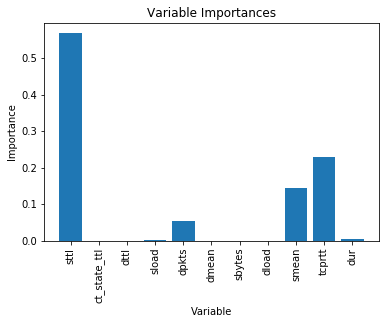

In [52]:
# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [53]:
list(zip(data_train, dt.feature_importances_))

[(array([6.20000000e+01, 1.00000000e+00, 2.52000000e+02, 2.17643906e+04,
         8.00000000e+00, 1.88000000e+02, 7.62000000e+02, 4.17520977e+04,
         7.60000000e+01, 5.46390000e-02, 2.52155000e-01]), 0.568033522696291),
 (array([2.5400000e+02, 1.0000000e+00, 2.5200000e+02, 1.9205250e+04,
         8.0000000e+00, 4.4000000e+01, 2.5160000e+03, 2.6285332e+03,
         2.5200000e+02, 1.3450600e-01, 9.4349200e-01]), 0.0),
 (array([3.10000000e+01, 0.00000000e+00, 2.90000000e+01, 5.51463625e+05,
         2.00000000e+00, 8.90000000e+01, 1.46000000e+02, 6.72332375e+05,
         7.30000000e+01, 0.00000000e+00, 1.05900000e-03]), 0.0),
 (array([2.54000000e+02, 1.00000000e+00, 2.52000000e+02, 5.69186133e+03,
         8.00000000e+00, 4.40000000e+01, 5.34000000e+02, 3.66835156e+03,
         5.30000000e+01, 1.57598000e-01, 6.76053000e-01]),
  0.00037057106159032647),
 (array([6.20000000e+01, 1.00000000e+00, 2.52000000e+02, 4.36387344e+04,
         2.20000000e+01, 8.70000000e+01, 1.39090000e+04, 5.

In [54]:
dt.n_features_

11

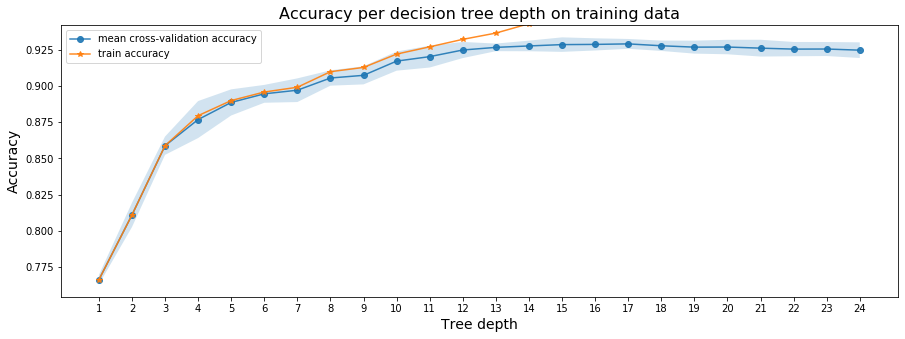

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(data_train, train_labels, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')

In [56]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth =14, random_state = 42)
dt.fit(data_train, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=14,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [57]:
#predictions on test data
predictions = dt.predict(data_test)

#errors

errors = abs(predictions - test_labels)

#mean absolute error
print('Mean Absolute error', round(np.mean(errors), 2), 'degrees')

Mean Absolute error 0.07 degrees


In [58]:
precision_recall_fscore_support(test_labels, predictions, average='macro')

(0.9285674795321327, 0.9318499322199812, 0.929707859509967, None)

In [59]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / (test_labels+1))

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 95.34 %.


In [49]:
# Get numerical feature importances
importances = list(dt.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: sttl                 Importance: 0.4
Variable: tcprtt               Importance: 0.18
Variable: smean                Importance: 0.17
Variable: dmean                Importance: 0.09
Variable: sbytes               Importance: 0.05
Variable: dur                  Importance: 0.05
Variable: dpkts                Importance: 0.04
Variable: ct_state_ttl         Importance: 0.01
Variable: sload                Importance: 0.01
Variable: dload                Importance: 0.01
Variable: dttl                 Importance: 0.0


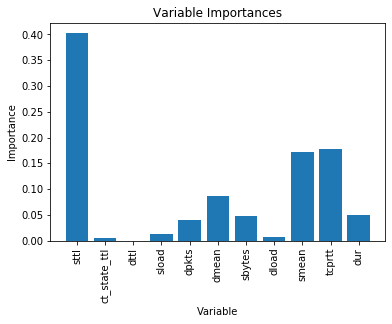

In [50]:
# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [56]:
pip install scapy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 613.9 kB/s eta 0:00:00m eta 0:00:010:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for scapy: filename=scapy-2.4.5-py2.py3-none-any.whl size=1261542 sha256=db920b54d1f882ab5274e57fe8d37987d3a6e24ac544fb7e96c68304729e2634
  Stored in directory: /home/bash/.cache/pip/wheels/b9/6e/c0/0157e466a5e02d3ff28fc7587dff329b4a967a23b3f9b11385
Successfully built scapy
Note: you may need to restart the kernel to use updated packages.


In [48]:
import pickle as pickle
filename = 'dtfin.sav'
pickle.dump(dt, open(filename, 'wb'))

In [31]:
one_hot_train_label_attack_category_orig = pd.get_dummies(train_label_attack_category_orig)
one_hot_train_label_attack_category_orig.describe()
print(one_hot_train_label_attack_category_orig.sum(axis=0))

 Fuzzers            5051
Analysis             526
Backdoors            534
DoS                 1167
Exploits            5409
Generic             7522
Normal            677786
Reconnaissance      1759
Shellcode            223
Worms                 24
dtype: int64


In [32]:
#Attack: Analysis
data_train = data_train_orig
data_label = np.array(one_hot_train_label_attack_category_orig['Analysis'])
data_train, data_test, train_labels, test_labels = train_test_split(data_train, data_label, test_size = 0.25, random_state = 50)
print('shapes', data_test.shape, data_train.shape)
print(np.sum(test_labels, axis = 0))
weight = 100

sample_weight = np.array([weight if i == 1 else 1 for i in train_labels])
sample_weight

NameError: name 'data_train_orig' is not defined

In [ ]:
rf = RandomForestClassifier(n_estimators = 5, n_jobs=2, random_state=0, max_depth=10)

rf.fit(data_train, train_labels, sample_weight)

#predictions on test data
predictions = rf.predict(data_test)
confusion_matrix(test_labels, predictions)

In [ ]:
precision_recall_fscore_support(test_labels, predictions, average='macro')

In [ ]:
#Attack: Backdoor
weight = 100

data_train = data_train_orig
data_label = np.array(one_hot_train_label_attack_category_orig['Backdoors'])
data_train, data_test, train_labels, test_labels = train_test_split(data_train, data_label, test_size = 0.25, random_state = 50)
print('shapes', data_test.shape, data_train.shape)
print(np.sum(test_labels, axis = 0))


sample_weight = np.array([weight if i == 1 else 1 for i in train_labels])

rf = RandomForestClassifier(n_estimators = 10, n_jobs=2, random_state=0, max_depth=10)

rf.fit(data_train, train_labels, sample_weight)

#predictions on test data
predictions = rf.predict(data_test)
confusion_matrix(test_labels, predictions)


In [ ]:
precision_recall_fscore_support(test_labels, predictions, average='macro')

In [ ]:
#Attack: DoS
weight = 10

data_train = data_train_orig
data_label = np.array(one_hot_train_label_attack_category_orig['DoS'])
data_train, data_test, train_labels, test_labels = train_test_split(data_train, data_label, test_size = 0.25, random_state = 50)
print('shapes', data_test.shape, data_train.shape)
print(np.sum(test_labels, axis = 0))


sample_weight = np.array([weight if i == 1 else 1 for i in train_labels])

rf = RandomForestClassifier(n_estimators = 10, n_jobs=2, random_state=0, max_depth=10)

rf.fit(data_train, train_labels, sample_weight)

#predictions on test data
predictions = rf.predict(data_test)
confm = confusion_matrix(test_labels, predictions)
print(confm)
precision_recall_fscore_support(test_labels, predictions, average='macro')

In [ ]:
#Attack: Exploits
weight = 5

data_train = data_train_orig
data_label = np.array(one_hot_train_label_attack_category_orig['Exploits'])
data_train, data_test, train_labels, test_labels = train_test_split(data_train, data_label, test_size = 0.25, random_state = 50)
print('shapes', data_test.shape, data_train.shape)
print(np.sum(test_labels, axis = 0))


sample_weight = np.array([weight if i == 1 else 1 for i in train_labels])

rf = RandomForestClassifier(n_estimators = 10, n_jobs=2, random_state=0, max_depth=10)

rf.fit(data_train, train_labels, sample_weight)

#predictions on test data
predictions = rf.predict(data_test)
confm = confusion_matrix(test_labels, predictions)
print(confm)
precision_recall_fscore_support(test_labels, predictions, average='macro')

In [ ]:
#Attack: Fuzzers
weight = 10

data_train = data_train_orig
data_label = np.array(one_hot_train_label_attack_category_orig[' Fuzzers'])
data_train, data_test, train_labels, test_labels = train_test_split(data_train, data_label, test_size = 0.25, random_state = 50)
print('shapes', data_test.shape, data_train.shape)
print(np.sum(test_labels, axis = 0))


sample_weight = np.array([weight if i == 1 else 1 for i in train_labels])

rf = RandomForestClassifier(n_estimators = 10, n_jobs=2, random_state=0, max_depth=10)

rf.fit(data_train, train_labels, sample_weight)

#predictions on test data
predictions = rf.predict(data_test)
confm = confusion_matrix(test_labels, predictions)
print(confm)
precision_recall_fscore_support(test_labels, predictions, average='macro')

In [ ]:
#Attack: Generic
weight = 1

data_train = data_train_orig
data_label = np.array(one_hot_train_label_attack_category_orig['Generic'])
data_train, data_test, train_labels, test_labels = train_test_split(data_train, data_label, test_size = 0.25, random_state = 50)
print('shapes', data_test.shape, data_train.shape)
print(np.sum(test_labels, axis = 0))


sample_weight = np.array([weight if i == 1 else 1 for i in train_labels])

rf = RandomForestClassifier(n_estimators = 10, n_jobs=2, random_state=0, max_depth=10)

rf.fit(data_train, train_labels, sample_weight)

#predictions on test data
predictions = rf.predict(data_test)
confm = confusion_matrix(test_labels, predictions)
print(confm)
precision_recall_fscore_support(test_labels, predictions, average='macro')

In [ ]:
#Attack: Reconnaissance
weight = 10

data_train = data_train_orig
data_label = np.array(one_hot_train_label_attack_category_orig['Reconnaissance'])
data_train, data_test, train_labels, test_labels = train_test_split(data_train, data_label, test_size = 0.25, random_state = 50)
print('shapes', data_test.shape, data_train.shape)
print(np.sum(test_labels, axis = 0))


sample_weight = np.array([weight if i == 1 else 1 for i in train_labels])

rf = RandomForestClassifier(n_estimators = 10, n_jobs=2, random_state=0, max_depth=10)

rf.fit(data_train, train_labels, sample_weight)

#predictions on test data
predictions = rf.predict(data_test)
confm = confusion_matrix(test_labels, predictions)
print(confm)
precision_recall_fscore_support(test_labels, predictions, average='macro')

In [ ]:
#Attack: Shellcode
weight = 1000

data_train = data_train_orig
data_label = np.array(one_hot_train_label_attack_category_orig['Shellcode'])
data_train, data_test, train_labels, test_labels = train_test_split(data_train, data_label, test_size = 0.25, random_state = 50)
print('shapes', data_test.shape, data_train.shape)
print(np.sum(test_labels, axis = 0))


sample_weight = np.array([weight if i == 1 else 1 for i in train_labels])

rf = RandomForestClassifier(n_estimators = 10, n_jobs=2, random_state=0, max_depth=10)

rf.fit(data_train, train_labels, sample_weight)

#predictions on test data
predictions = rf.predict(data_test)
confm = confusion_matrix(test_labels, predictions)
print(confm)
precision_recall_fscore_support(test_labels, predictions, average='macro')